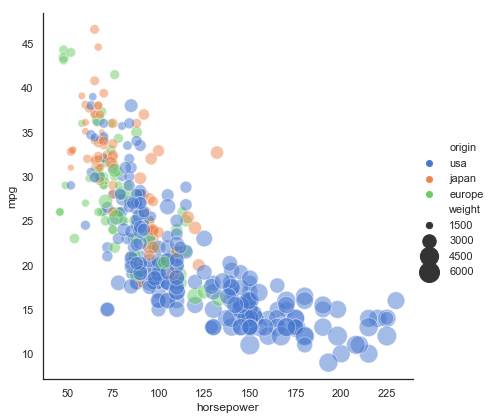

In [6]:
import pandas as pd
import seaborn as sns

sns.set()

sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
# 其中x,y为横轴坐标变量，hue表示分类类别，size表示点的大小
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)



In [ ]:
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/brain_networks.csv

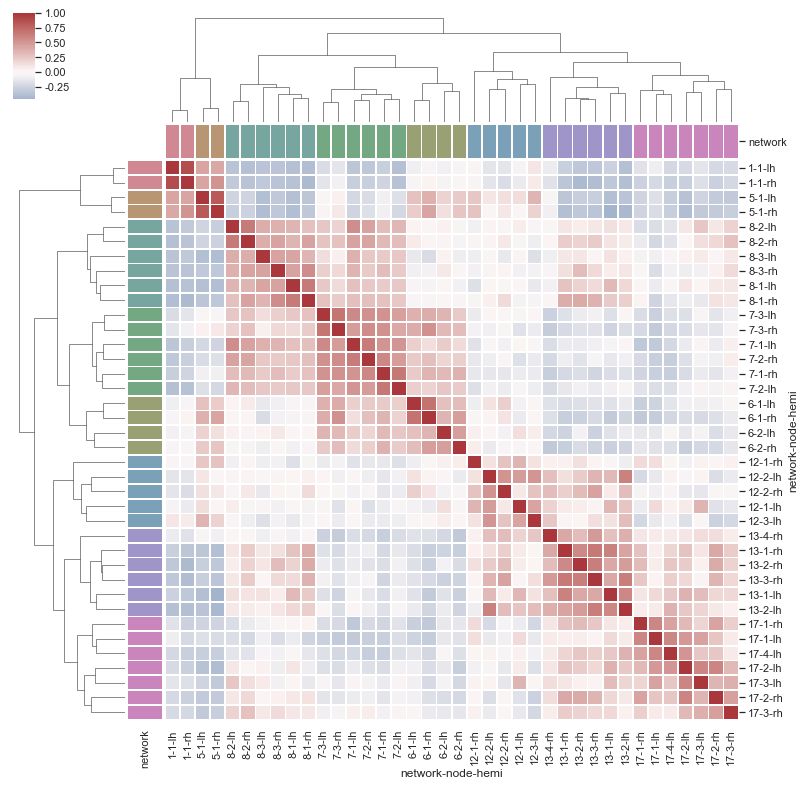

In [3]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
# 建立矩阵类数据集
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
#创建调色盘
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
# 将矩阵数据集绘制为分层聚类热图
# row_colors,col_color行或列标记的颜色列表
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));
